In [40]:
# Импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка данных
file_path = 'diabetes_prediction_dataset.csv'  # Укажите путь к вашему файлу
diabetes_data = pd.read_csv(file_path)

# Просмотр первых строк данных
print("Первые строки данных:")
display(diabetes_data.head())

# Общая информация о данных
print("\nИнформация о данных:")
print(diabetes_data.info())


Первые строки данных:


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0



Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB
None


In [41]:
# Основные статистики для числовых данных
print("\nСтатистики данных:")
display(diabetes_data.describe())



Статистики данных:


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [42]:
# Проверка пропущенных значений
print("\nПропущенные значения:")
print(diabetes_data.isnull().sum())



Пропущенные значения:
gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


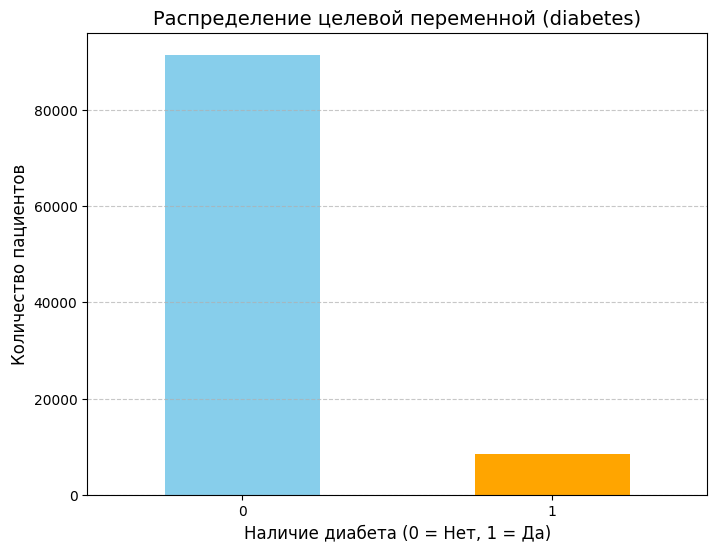

In [43]:
# Распределение целевой переменной
plt.figure(figsize=(8, 6))
diabetes_data['diabetes'].value_counts().plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Распределение целевой переменной (diabetes)', fontsize=14)
plt.xlabel('Наличие диабета (0 = Нет, 1 = Да)', fontsize=12)
plt.ylabel('Количество пациентов', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


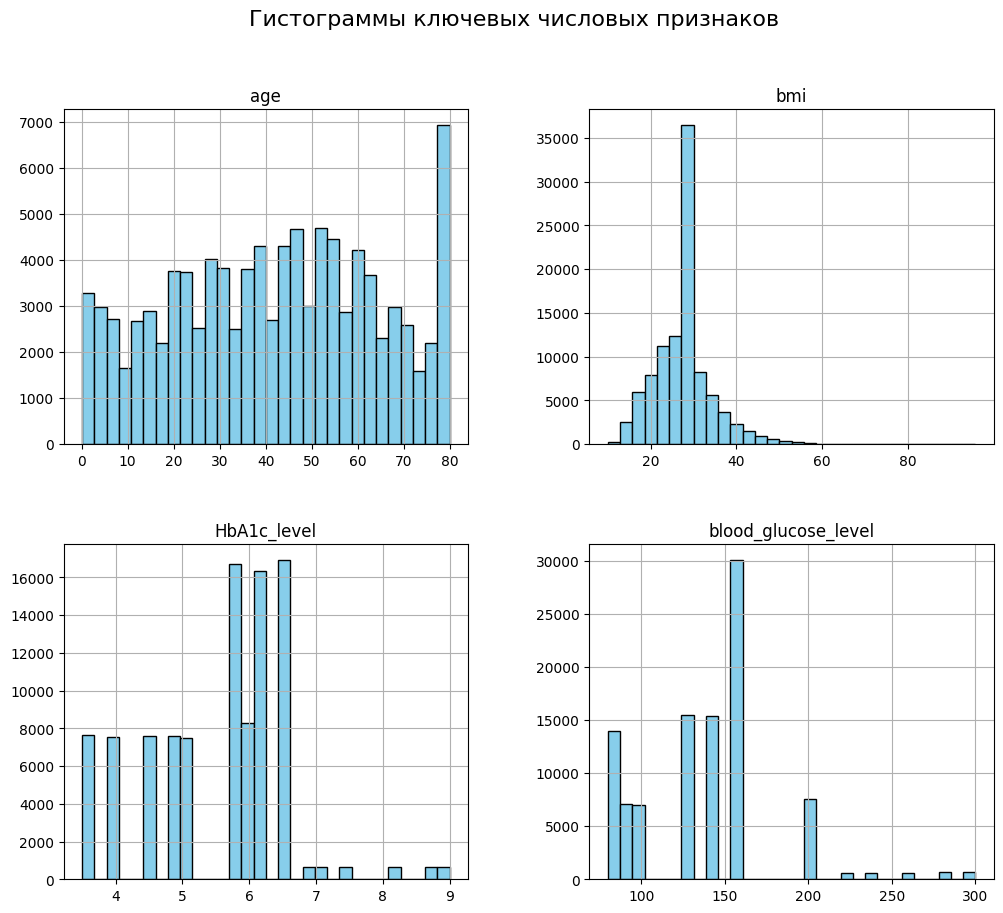

In [44]:
# Гистограммы для ключевых числовых признаков
features = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
diabetes_data[features].hist(figsize=(12, 10), bins=30, color='skyblue', edgecolor='black')
plt.suptitle('Гистограммы ключевых числовых признаков', fontsize=16)
plt.show()


In [45]:
# Функция для удаления выбросов на основе интерквартильного расстояния
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Удаление выбросов для ключевых столбцов
for col in ['age', 'bmi', 'blood_glucose_level']:
    before_removal = len(diabetes_data)
    diabetes_data = remove_outliers(diabetes_data, col)
    after_removal = len(diabetes_data)
    print(f"Столбец {col}: удалено {before_removal - after_removal} выбросов.")
    # Отображение результата (количество оставшихся строк)
    print(f"Оставшиеся строки после удаления выбросов: {len(diabetes_data)}")


Столбец age: удалено 0 выбросов.
Оставшиеся строки после удаления выбросов: 100000
Столбец bmi: удалено 7086 выбросов.
Оставшиеся строки после удаления выбросов: 92914
Столбец blood_glucose_level: удалено 1675 выбросов.
Оставшиеся строки после удаления выбросов: 91239


In [46]:
from sklearn.preprocessing import LabelEncoder
print("Уникальные значения в столбце 'gender':")
print(diabetes_data['gender'].unique())

# Кодирование переменной gender
le = LabelEncoder()
diabetes_data['gender'] = le.fit_transform(diabetes_data['gender'])

# Отображение результата кодирования gender
print("Уникальные значения gender после кодирования:")
print(diabetes_data['gender'].unique())

# Отображение соответствия меток и категорий
print("Соответствие меток и категорий:")
for index, label in enumerate(le.classes_):
    print(f"{label}: {index}")

# Кодирование smoking_history с помощью OneHotEncoder
diabetes_data = pd.get_dummies(diabetes_data, columns=['smoking_history'], drop_first=True)

# Отображение результата кодирования smoking_history
print("Пример обновленных столбцов после OneHotEncoding:")
print(diabetes_data.head())


Уникальные значения в столбце 'gender':
['Female' 'Male' 'Other']
Уникальные значения gender после кодирования:
[0 1 2]
Соответствие меток и категорий:
Female: 0
Male: 1
Other: 2
Пример обновленных столбцов после OneHotEncoding:
   gender   age  hypertension  heart_disease    bmi  HbA1c_level  \
0       0  80.0             0              1  25.19          6.6   
1       0  54.0             0              0  27.32          6.6   
2       1  28.0             0              0  27.32          5.7   
3       0  36.0             0              0  23.45          5.0   
4       1  76.0             1              1  20.14          4.8   

   blood_glucose_level  diabetes  smoking_history_current  \
0                  140         0                    False   
1                   80         0                    False   
2                  158         0                    False   
3                  155         0                     True   
4                  155         0                     True

In [47]:
from sklearn.preprocessing import StandardScaler

# Нормализация числовых данных
scaler = StandardScaler()
numerical_features = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
diabetes_data[numerical_features] = scaler.fit_transform(diabetes_data[numerical_features])

# Отображение первых строк после нормализации
print("Первые строки после нормализации:")
print(diabetes_data[numerical_features].head())


Первые строки после нормализации:
        age       bmi  HbA1c_level  blood_glucose_level
0  1.700377 -0.236198     1.064593             0.145124
1  0.549140  0.200062     1.064593            -1.552541
2 -0.602096  0.200062     0.202606             0.654423
3 -0.247870 -0.592579    -0.467828             0.569540
4  1.523264 -1.270523    -0.659380             0.569540


In [48]:
from sklearn.model_selection import train_test_split

# Разделение данных на обучающую и тестовую выборки
X = diabetes_data.drop('diabetes', axis=1)
y = diabetes_data['diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Отображение формы выборок
print("Размеры выборок:")
print(f"Обучающая выборка: X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Тестовая выборка: X_test: {X_test.shape}, y_test: {y_test.shape}")


Размеры выборок:
Обучающая выборка: X_train: (72991, 12), y_train: (72991,)
Тестовая выборка: X_test: (18248, 12), y_test: (18248,)


In [49]:
print("Распределение целевой переменной в обучающей выборке:")
print(y_train.value_counts(normalize=True))

print("\nРаспределение целевой переменной в тестовой выборке:")
print(y_test.value_counts(normalize=True))


Распределение целевой переменной в обучающей выборке:
diabetes
0    0.940979
1    0.059021
Name: proportion, dtype: float64

Распределение целевой переменной в тестовой выборке:
diabetes
0    0.943062
1    0.056938
Name: proportion, dtype: float64


In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
import numpy as np


In [51]:
# Инициализация моделей
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "SVC": SVC(random_state=42)
}

# Оценка моделей с помощью кросс-валидации
results = {}

for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    results[name] = {
        "Mean Accuracy": np.mean(scores),
        "Std Deviation": np.std(scores)
    }
    print(f"{name} - Mean Accuracy: {np.mean(scores):.4f}, Std Dev: {np.std(scores):.4f}")


Logistic Regression - Mean Accuracy: 0.9642, Std Dev: 0.0010
Random Forest - Mean Accuracy: 0.9725, Std Dev: 0.0006
Gradient Boosting - Mean Accuracy: 0.9743, Std Dev: 0.0007
SVC - Mean Accuracy: 0.9682, Std Dev: 0.0013


In [54]:
import time  # Для измерения времени
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Словарь для хранения метрик
metrics = {
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1-score": [],
    "Training Time (s)": [],
    "Prediction Time (s)": []
}

# Обучение и оценка моделей
for name, model in models.items():
    # Измерение времени обучения
    start_time = time.time()
    model.fit(X_train, y_train)  # Обучение модели
    training_time = time.time() - start_time

    # Измерение времени предсказания
    start_time = time.time()
    y_pred = model.predict(X_test)  # Предсказания на тестовой выборке
    prediction_time = time.time() - start_time

    # Вычисление метрик
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Сохранение метрик
    metrics["Model"].append(name)
    metrics["Accuracy"].append(acc)
    metrics["Precision"].append(prec)
    metrics["Recall"].append(rec)
    metrics["F1-score"].append(f1)
    metrics["Training Time (s)"].append(training_time)
    metrics["Prediction Time (s)"].append(prediction_time)

    # Печать результатов для каждой модели
    print(f"{name}:")
    print(f"  Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1-score: {f1:.4f}")
    print(f"  Training Time: {training_time:.4f} s, Prediction Time: {prediction_time:.4f} s\n")


Logistic Regression:
  Accuracy: 0.9637, Precision: 0.8244, Recall: 0.4610, F1-score: 0.5914
  Training Time: 0.0868 s, Prediction Time: 0.0030 s

Random Forest:
  Accuracy: 0.9724, Precision: 0.9161, Recall: 0.5679, F1-score: 0.7011
  Training Time: 3.6078 s, Prediction Time: 0.1472 s

Gradient Boosting:
  Accuracy: 0.9750, Precision: 0.9883, Recall: 0.5679, F1-score: 0.7213
  Training Time: 4.3716 s, Prediction Time: 0.0235 s

SVC:
  Accuracy: 0.9693, Precision: 0.9959, Recall: 0.4620, F1-score: 0.6312
  Training Time: 21.1071 s, Prediction Time: 8.2108 s



In [55]:
# Сравнительная таблица
import pandas as pd

metrics_df = pd.DataFrame(metrics)
metrics_df = metrics_df.sort_values(by="F1-score", ascending=False)

# Отображение таблицы
print("\nСравнительные результаты моделей:")
display(metrics_df)



Сравнительные результаты моделей:


,Model,Accuracy,Precision,Recall,F1-score,Training Time (s),Prediction Time (s)
2,Gradient Boosting,0.975011,0.988275,0.567854,0.721271,4.371619,0.023540
1,Random Forest,0.972435,0.916149,0.567854,0.701129,3.607764,0.147188
3,SVC,0.969257,0.995851,0.461983,0.631164,21.107147,8.210790
0,Logistic Regression,0.963722,0.824441,0.461020,0.591358,0.086820,0.003049
